In [1]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

In [2]:
df = pd.read_csv("NAS.csv")                         #Read the csv

In [3]:
df.iloc[:, 0]= pd.to_datetime(df.iloc[:, 0])        #Convert date to datetime  
df.set_index('Date',inplace=True)                   #Setting date as index

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4253 entries, 2003-12-18 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4218 non-null   float64
 1   High       4218 non-null   float64
 2   Low        4218 non-null   float64
 3   Close      4218 non-null   float64
 4   Adj Close  4218 non-null   float64
 5   Volume     4218 non-null   float64
dtypes: float64(6)
memory usage: 232.6 KB


In [5]:
df.replace(0, np.nan, inplace=True) #Replacing 0 with NaN

In [6]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4253 entries, 2003-12-18 to 2020-10-16
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4218 non-null   float64
 1   High       4218 non-null   float64
 2   Low        4218 non-null   float64
 3   Close      4218 non-null   float64
 4   Adj Close  4218 non-null   float64
 5   Volume     4204 non-null   float64
dtypes: float64(6)
memory usage: 232.6 KB


In [8]:
df.isnull().sum()/len(df)*100  #Checking % of data that's 0

Open         0.822949
High         0.822949
Low          0.822949
Close        0.822949
Adj Close    0.822949
Volume       1.152128
dtype: float64

In [9]:
df.dropna(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [10]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4204.000000,4204.000000,4204.000000,4204.000000,4204.000000,4.204000e+03
mean,79.895867,81.192986,78.314685,79.729549,79.729549,1.734079e+06
std,55.190463,55.964363,54.334272,55.112770,55.112770,1.031195e+07
min,0.601000,0.620000,0.585000,0.600600,0.600600,3.500000e+02
25%,37.693650,38.377500,36.565601,37.419450,37.419450,1.038025e+05
50%,63.989799,64.846802,62.561401,63.989799,63.989799,3.328355e+05
75%,128.550995,130.779007,126.265999,128.550995,128.550995,7.037935e+05
max,219.335999,220.535995,213.509003,216.822006,216.822006,4.075113e+08


In [11]:
X = df[['Close']]
y= (df['Close'].shift(-1))

In [12]:
print(X)

                Close
Date                 
2003-12-18  19.139799
2003-12-19  18.454201
2003-12-22  18.054300
2003-12-23  17.425800
2003-12-29  17.254400
...               ...
2020-10-12   0.676800
2020-10-13   0.600600
2020-10-14   0.626000
2020-10-15   0.605000
2020-10-16   0.610600

[4204 rows x 1 columns]


In [13]:
print(y)

Date
2003-12-18    18.454201
2003-12-19    18.054300
2003-12-22    17.425800
2003-12-23    17.254400
2003-12-29    17.711500
                ...    
2020-10-12     0.600600
2020-10-13     0.626000
2020-10-14     0.605000
2020-10-15     0.610600
2020-10-16          NaN
Name: Close, Length: 4204, dtype: float64


# COPYPASTA FROM:
https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

LINEAR REGRESSION

-Something is wrong, guess some shift in dates

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [44]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [45]:
print(regressor.intercept_)

0.07691148104777312


In [46]:
print(regressor.coef_)

[0.99869316]


In [47]:
y_pred = regressor.predict(X_test)

In [48]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.sort_values(by='Date',inplace=True) 
df2

,Actual,Predicted
Date,,
2003-12-19,18.0543,18.506996
2003-12-22,17.4258,18.107617
2003-12-29,17.7115,17.308763
2003-12-30,17.7686,17.765265
2004-01-08,17.4258,16.795235
...,...,...
2020-10-07,0.9178,0.998306
2020-10-08,0.6964,0.993512
2020-10-09,0.6768,0.772401


<AxesSubplot:xlabel='Date'>

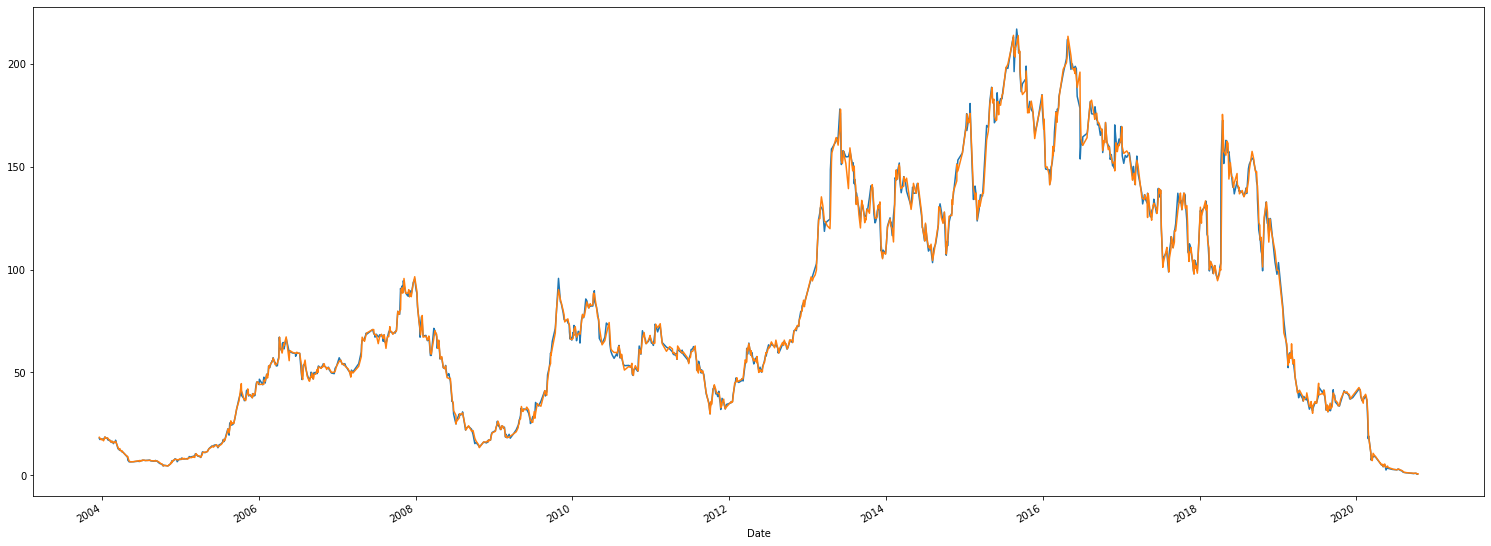

In [50]:
df2['Actual'].plot(figsize=(26,10))
df2['Predicted'].plot(figsize=(26,10))

In [36]:
#df2.isnull().sum()/len(df)*100  #Checking % of data that's 0
df2.dropna(inplace=True)

In [37]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(df2['Actual'], df2['Predicted']))
print('Mean Squared Error:', metrics.mean_squared_error(df2['Actual'], df2['Predicted']))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(df2['Actual'], df2['Predicted'])))

Mean Absolute Error: 1.6408363569937243
Mean Squared Error: 8.471675386487966
Root Mean Squared Error: 2.910614262743857


In [57]:
r=(df2['Actual']/df2['Predicted'])



<AxesSubplot:xlabel='Date'>

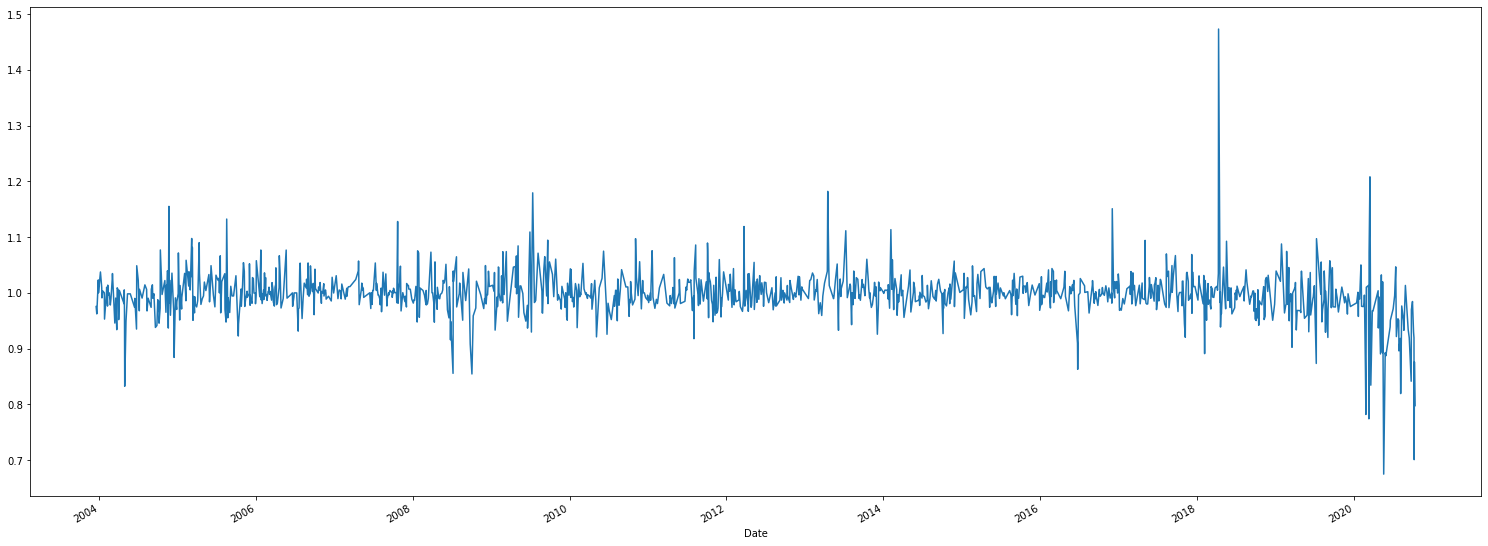

In [58]:
r.plot(figsize=(26,10))